# Polynomial Regression

## Home Assignment - Time Variant Speed Prediction

The dataset is a plot of time vs speed for a distance D(which is constant). The output is non linear in nature. We have to predict speed based on time with non linear regression. 

Perform the following operations.

#### 1. Plot the time vs speed. What degree of polynomial do you think is this?
#### 2. Split the data into training & testing. It should be a 75:25 split with random_state 5. Obtain polynomial features for training and testing dataset with degree 3. 
#### 3. Perform linear regression on the transformed training dataset. Plot the polynomial curve obtained along with training data set. Does it underfit, properly fit or overfit?
#### 4. Predict the output for test dataset, and plot a scatter of test output vs obtained output. Obtain MSE and R^2 score. 

#### Vary the degree from 3 to 7. For which values of degree does the data start to overfit? Plot the training dataset and obtained curve for each degree and justify.

#### Out of degrees chosen above, which gives the best predictions? (Choose on the basis of MSE, R^2 score and plot)

#### Perform KFold Cross validation with k=3 to 10 for degree 3, 4, 5.

In [2]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('time_speed.csv')
df
df.head()

,time,speed
0,1.0,60.662926
1,1.5,32.280792
2,2.0,57.397340
3,2.5,43.504416
4,3.0,14.868792


In [1]:
#Q1
plt.figure(figsize=[12,6])
plt.grid(True)
plt.title("Time VS Speed")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.tight_layout()
plt.axis([0,60,0,62])
# plt.legend(label="time Vs speed")
plt.scatter(df['time'],df['speed'],color='r',marker="*")
#reshape
X=np.array(df['time']).reshape(-1,1)
Y=np.array(df['speed']).reshape(-1,1)


NameError: name 'plt' is not defined

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

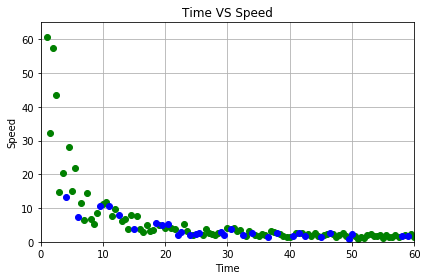

In [3]:
#Q2
from sklearn.model_selection import train_test_split

time_train,time_test,speed_train,speed_test=train_test_split(df['time'],df["speed"],test_size=0.25,random_state=5)
#other arguments - random_state=none,shuffle=True
x_train=time_train.values.reshape(-1,1)
y_train=speed_train.values.reshape(-1,1)
x_test=time_test.values.reshape(-1,1)
y_test=speed_test.values.reshape(-1,1)

plt.figure()
plt.grid(True)
plt.title("Time VS Speed")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.plot(time_train,speed_train,'go')
plt.plot(time_test,speed_test,'bo')
plt.tight_layout()
plt.axis([0,60,0,65])
plt.grid(True)

poly = PolynomialFeatures(degree=3)
#degree=2,interaction _only,false,include,include_bias=True,order='c'

QuadraticCoeff = poly.fit_transform(X)
# print(QuadraticCoeff[0:3])

model = LinearRegression()
model.fit(QuadraticCoeff,Y)

# print(Y)
# print(model.predict(QuadraticCoeff))

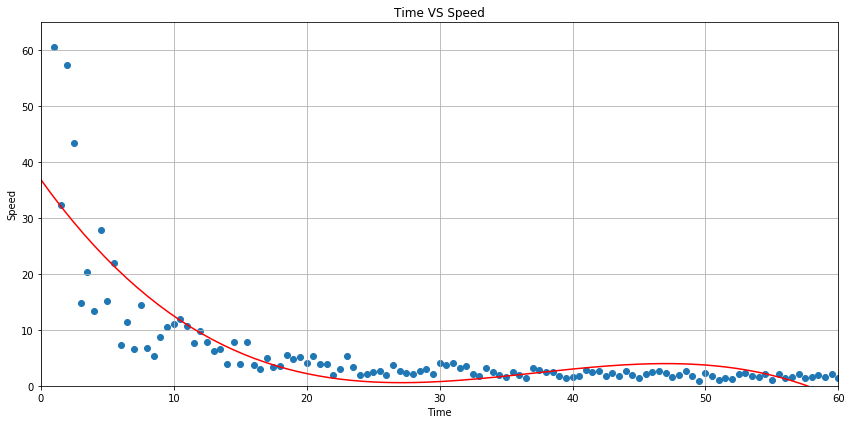

In [4]:
#Q3
xx=np.linspace(0,60,150).reshape(-1,1)
#print(xx)`
xx_quadratic = poly.fit_transform(xx)

plt.figure(figsize=[12,6])
plt.title("Time VS Speed")
plt.xlabel("Time")
plt.ylabel("Speed")
plt.tight_layout()
plt.axis([0,60,0,65])
plt.grid(True)
plt.plot(xx,model.predict(xx_quadratic),c='r',linestyle='-')
plt.scatter(X,Y)
plt.show()

In [15]:
#Q4
from sklearn.metrics import mean_squared_error
# plt.plot([0,60],[model.predict([[0]]),model.predict([[60]])],color='r')
# print(model.score(X,Y))   #r2 

z=Y.reshape(-1,1)
mse = mean_squared_error(Y, model.predict(X), multioutput = 'uniform_average')
# multioutput defines weight used to average error
print("MSE IS",mse )

ValueError: shapes (119,1) and (6,1) not aligned: 1 (dim 1) != 6 (dim 0)

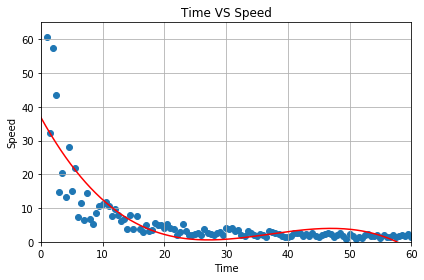

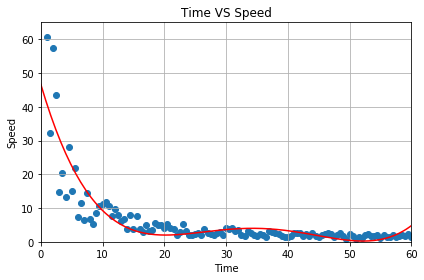

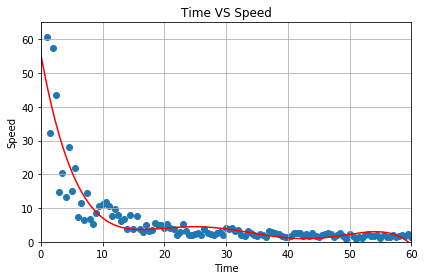

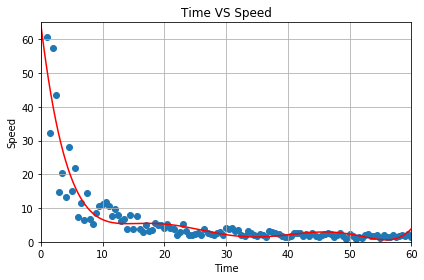

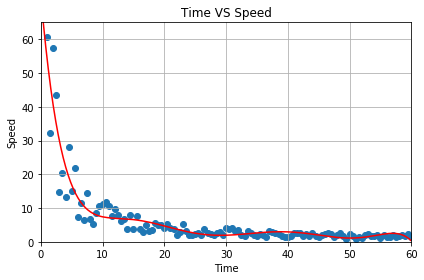

In [6]:
#Q5
for i in range(3,8):
    poly=PolynomialFeatures(degree=i)
    QuadraticCoeff = poly.fit_transform(X)

    #Creat and fit the model
    model = LinearRegression()
    model.fit(QuadraticCoeff,Y)

    xx=np.linspace(0,60,150).reshape(-1,1)

    xx_quad=poly.fit_transform(xx)
    plt.figure()
    plt.axis([0,60,0,65])
    plt.grid(True)
    plt.title("Time VS Speed")
    plt.xlabel("Time")
    plt.ylabel("Speed")
    plt.plot(xx,model.predict(xx_quad),color='r',linestyle='-',label="degree")
    plt.scatter(X,Y)
    plt.tight_layout()
    

In [ ]:
#Q6


In [7]:
#Q7
from sklearn.model_selection import cross_val_score
from sklearn import metrics

for i in range(3,11):
    print("K fold {0}".format(i))
    for j in range(3,6):
        poly=PolynomialFeatures(degree=j)
        QuadraticCoeff = poly.fit_transform(X)
        model = LinearRegression()
        model.fit(QuadraticCoeff,Y)
        scores = cross_val_score(model,df['time'].values.reshape(-1,1),df['speed'].values.reshape(-1,1), cv=i)
        print("Cross-valinated scores:",scores)
        print("Accuracy: %0.2f (+/- %0.2f)"%(scores.mean(),scores.std()*2))
        print("***************************************************************")

K fold 3
Cross-valinated scores: [-4.61834592e-01 -3.13755562e+01 -6.15282928e+02]
Accuracy: -215.71 (+/- 565.65)
***************************************************************
Cross-valinated scores: [-4.61834592e-01 -3.13755562e+01 -6.15282928e+02]
Accuracy: -215.71 (+/- 565.65)
***************************************************************
Cross-valinated scores: [-4.61834592e-01 -3.13755562e+01 -6.15282928e+02]
Accuracy: -215.71 (+/- 565.65)
***************************************************************
K fold 4
Cross-valinated scores: [  -0.61926592  -38.4605038    -7.43800043 -401.842993  ]
Accuracy: -112.09 (+/- 335.79)
***************************************************************
Cross-valinated scores: [  -0.61926592  -38.4605038    -7.43800043 -401.842993  ]
Accuracy: -112.09 (+/- 335.79)
***************************************************************
Cross-valinated scores: [  -0.61926592  -38.4605038    -7.43800043 -401.842993  ]
Accuracy: -112.09 (+/- 335.79)
********